# MUN 87/2-1-3

In [3]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [4]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/2-1-3'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
#display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum, fill_value = 0)

In [8]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
# plt.title('MUN 87/2-1-3\nFundverteilung\n')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-14_MUN87-213_VerteilungFunde_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [5]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-17_MUN87-2-1-3_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,gebrannter Lehm,66,33.5,2.02,15.7
1,Keramik,130,66.0,10.84,84.1
2,Sonder,1,0.5,0.02,0.2


## Fragmentierung der Keramik

In [5]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/2-1-3')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

,objID,bef_nr,Gewicht,Gr_Clist,Art,Tiefe
0,353,87/2-1-3,618,500,K,53
1,354,87/2-1-3,684,200,K,53
2,356,87/2-1-3,289,200,K,62
3,357,87/2-1-3,1803,500,K,130
4,364,87/2-1-3,167,70,K,185


In [6]:
df_pivot = df.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
# Dummy-Werte manuell:
df_pivot = df_pivot.rename(index={500: '>200'})
df_pivot

Gr_Clist
30      21
70      45
120     12
200      9
>200     4
Name: objID, dtype: int64

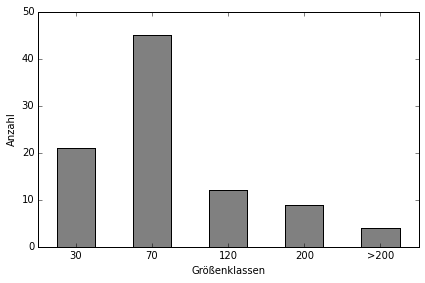

In [7]:
df_pivot.plot(kind = 'bar', color = 'Gray')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.ylim([0,50]) 
plt.tight_layout()
plt.savefig('../output/figs/9-14_MUN87-213_KeramikFragmentierung.pdf')
plt.show()

> **MUN 87/2-1-3** Fragmentierungsgrad

## Verzierungselemente

In [8]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            t_Obj.Tiefe,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Komplex.bef_nr) = '87/2-1-3')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# display(df.head())

In [9]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,V01a,V01c,V01e,V03a,V03b,V03c,V04d,V09b,V12a1,V12a2,V12c,VB2
pos,,,,,,,,,,,,
2 Rand,28,5,6,17,2,5,3,0,3,3,0,1
4 Hals,2,1,0,0,0,0,0,0,0,0,1,0
5 Schulter,0,1,0,0,0,0,0,0,0,0,0,0
6 Bauch,24,4,4,8,0,5,6,1,5,6,2,2


In [10]:
df_pivot = df_pivot.sort_index(ascending=True)

In [11]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
#plt.rcdefaults()
#%matplotlib inline

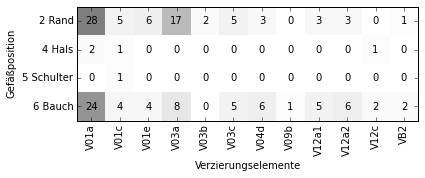

In [12]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-14_MUN87-213_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MUN 87/2-1-3** Verzierungselemente

n

In [13]:
df['objID'].nunique()

40